# Текучесть персонала

## Постановка проблемы

### Обзор проекта

Текучесть персонала – движение рабочей силы, обусловленное неудовлетворенностью сотрудника рабочим местом или неудовлетворенностью организации конкретным специалистом. Это одна из ключевых и самых актуальных проблем для любой современной организации. Цена текучести кадров для компании достаточно высока. Затраты на замену сотрудника связаны с количеством времени, потраченного на подбор кандидатов, и потерей производительности на несколько месяцев, пока новый сотрудник привыкает к организационной роли. Кроме того, высокий показатель текучести кадров не дает сформироваться слаженному коллективу и корпоративному духу в компании. 

### Проблема

Для того чтобы удержать ключевого сотрудника или заранее спланировать стратегию найма, требуется понимание того, когда и по какой причине сотрудники покидают организацию. В этом исследовании предпринимается попытка предсказать вероятность ухода сотрудника из компании и определить основные критерии принятия сотрудником такого решения.

## Описание данных

### Общий обзор

In [84]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from scipy import stats

In [ ]:
# Загрузим CSV-файл с данными
df_hr = pd.read_csv('turnover.csv')

Этот датасет о текучести кадров представляет собой реальный набор данных из блога Эдуарда Бабушкина, который можно использовать для прогнозирования оттока и анализа выживаемости сотрудников. Датасет содержит различную информацию о 1129 сотрудниках.

In [3]:
# Столбцы датасета
df_hr.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

In [4]:
# Поскольку датасет содержит не слишком много столбцов, отрисуем его на экран
df_hr

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


Набор данных содержит числовые и категориальные столбцы, предоставляющие различную информацию о личных данных сотрудника, его опыте и текущей занятости.

In [5]:
# Разделим столбцы по их типу
df_hr.columns.to_series().groupby(df_hr.dtypes).groups

{int64: ['event'], float64: ['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'], object: ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']}

In [6]:
# Проверим датасет на наличие пустых значений
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


Пустых значений в датасете нет.
8 столбцов содержат текстовые значения, 7 столбцов представлены числами с плавающей точкой, 1 столбец - целыми числами.

In [7]:
# Идентифицируем категориальные переменные
df_objects = df_hr.select_dtypes(include=['object']).copy() 

# И сохраним как переменную
print(df_objects.columns.values,'\n')

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way'] 



In [8]:
# Посмотрим уникальные значения этих переменных

for i in df_objects.columns.values:
    print(i,':', df_hr[i].unique(),'\n')

gender : ['m' 'f'] 

industry : ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate'] 

profession : ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finan�e' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting'] 

traffic : ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends'] 

coach : ['no' 'yes' 'my head'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 



In [9]:
# Создадим столбец has_coach для тех, у кого есть наставник
df_hr['has_coach'] = df_hr.coach.apply(lambda c: 1 if c != 'no' else 0)
df_hr[['has_coach','coach']]

,has_coach,coach
0,0,no
1,0,no
2,0,no
3,0,no
4,1,yes
...,...,...
1124,1,my head
1125,1,my head
1126,0,no
1127,0,no


In [10]:
# Перепроверим info
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
 16  has_coach     1129 non-null   int64  
dtypes: float64(7), int64(2), object(8)
memory usage: 150.1+ KB


Пустых значений в датасете по-прежнему нет. Столбец has_coach содержит целые числа.

### Обзор числовых характеристик

In [11]:
df_hr.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,has_coach
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628,0.395040
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016,0.489076
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000,0.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000,0.000000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000,0.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000,1.000000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


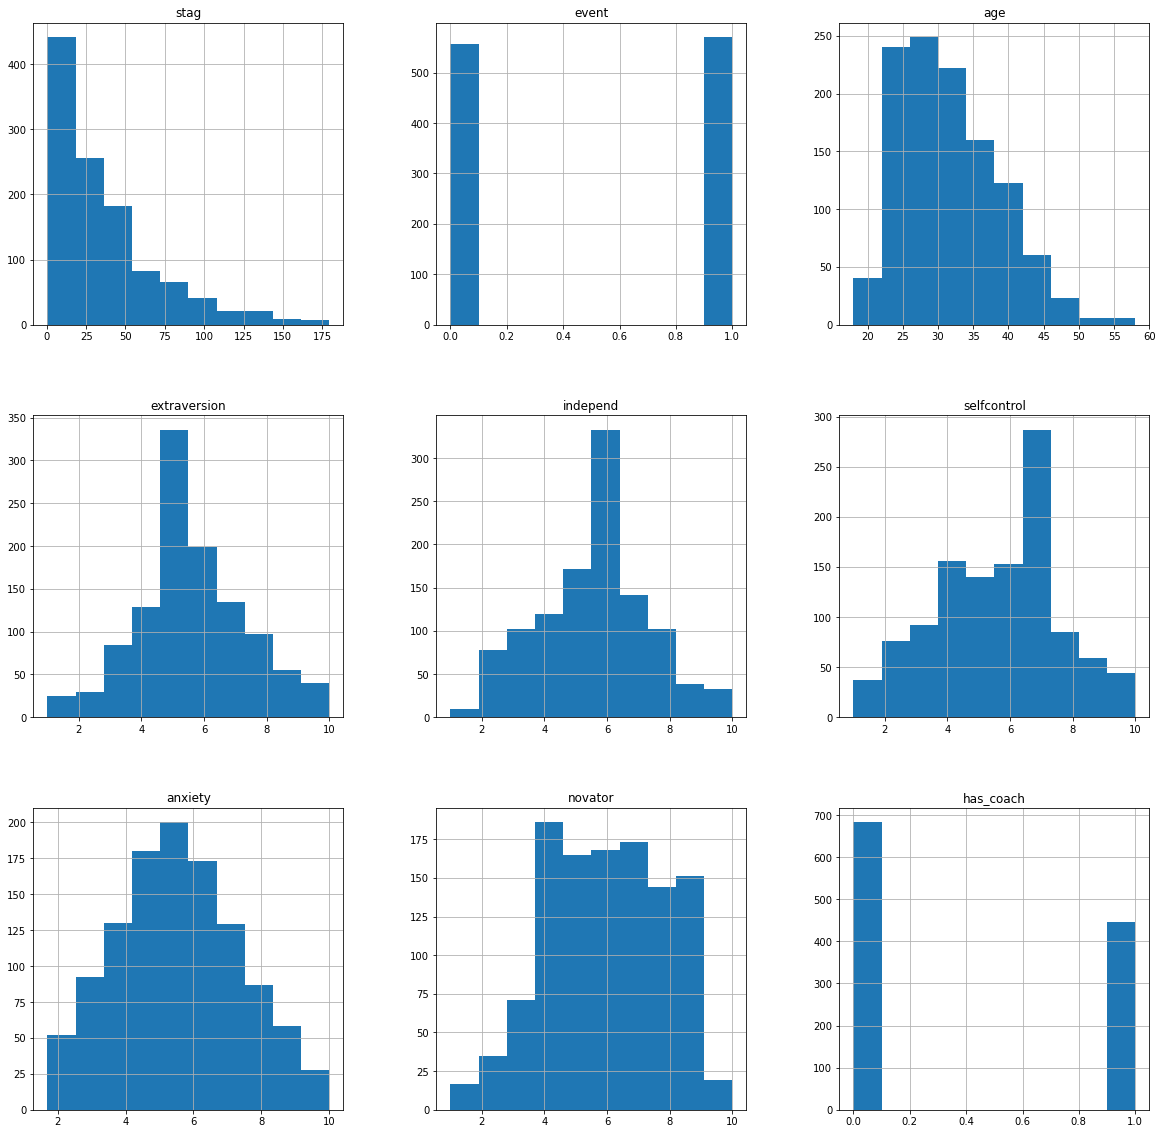

In [12]:
df_hr.hist(figsize=(20,20))
plt.show()

На основе гистограмм можно отметить несколько наблюдений:

* Опыт работы педставляет собой геометрическое распределение;
* Событие (факт ухода из компании) и наличие наставника представляют собой распределения Бернулли;
* Возраст напоминает логнормальное распределение, смещенное вправо;
* Показатели экстраверсии, независимости и тревожности напоминают нормальные распределения;
* Показатель самоконтроля напоминает логнормальное распределение, смещенное влево;
* Показатель новаторства соответствуют бета-распределению.

In [85]:
# Проверим, является ли распределение сотрудников по показателю экстраверсии нормальным
# H0: показатель экстраверсии сотрудников распределен по нормальному закону
# H1: закон распределения показателя экстраверсии сотрудников не является нормальным

print (stats.shapiro(df_hr['extraversion']))

ShapiroResult(statistic=0.9802069664001465, pvalue=2.7393767809691383e-11)


p-value < 0.05, следовательно, H0 отклоняется. Принимается H1: закон распределения показателя экстраверсии сотрудников не является нормальным.

In [86]:
# Проверим, является ли распределение сотрудников по показателю независимости нормальным
# H0: показатель независимости сотрудников распределен по нормальному закону
# H1: закон распределения показателя независимости сотрудников не является нормальным

print (stats.shapiro(df_hr['independ']))

ShapiroResult(statistic=0.9825876951217651, pvalue=2.2106083630291096e-10)


p-value < 0.05, следовательно, H0 отклоняется. Принимается H1: закон распределения показателя независимости сотрудников не является нормальным.

In [87]:
# Проверим, является ли распределение сотрудников по показателю тревожности нормальным
# H0: показатель тревожности сотрудников распределен по нормальному закону
# H1: закон распределения показателя тревожности сотрудников не является нормальным

print (stats.shapiro(df_hr['anxiety']))

ShapiroResult(statistic=0.9758038520812988, pvalue=8.496156794594867e-13)


p-value < 0.05, следовательно, H0 отклоняется. Принимается H1: закон распределения показателя тревожности сотрудников не является нормальным.

In [13]:
# Матрица корреляций по всему фрейму
df_hr.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,has_coach
stag,1.000000,-0.048361,-0.197381,-0.088227,0.000550,0.077076,0.014755,-0.037633,0.017293
event,-0.048361,1.000000,-0.048751,0.015458,0.051864,-0.040040,-0.063232,0.006825,-0.020177
age,-0.197381,-0.048751,1.000000,-0.149753,0.056129,0.038996,0.057782,0.039509,-0.296160
extraversion,-0.088227,0.015458,-0.149753,1.000000,-0.200052,-0.538039,-0.135046,0.297375,0.079879
independ,0.000550,0.051864,0.056129,-0.200052,1.000000,-0.165795,-0.427209,0.023865,0.050333
selfcontrol,0.077076,-0.040040,0.038996,-0.538039,-0.165795,1.000000,-0.107568,-0.565972,-0.030919
anxiety,0.014755,-0.063232,0.057782,-0.135046,-0.427209,-0.107568,1.000000,0.246668,-0.057240
novator,-0.037633,0.006825,0.039509,0.297375,0.023865,-0.565972,0.246668,1.000000,-0.037999
has_coach,0.017293,-0.020177,-0.296160,0.079879,0.050333,-0.030919,-0.057240,-0.037999,1.000000


В датасете отсутствуют высокие корреляции.
Средние отрицательные корреляции наблюдаются между переменными:
* экстраверсия и самоконтроль (-0,53);
* новаторство и самоконтроль (-0,57).

<AxesSubplot:>

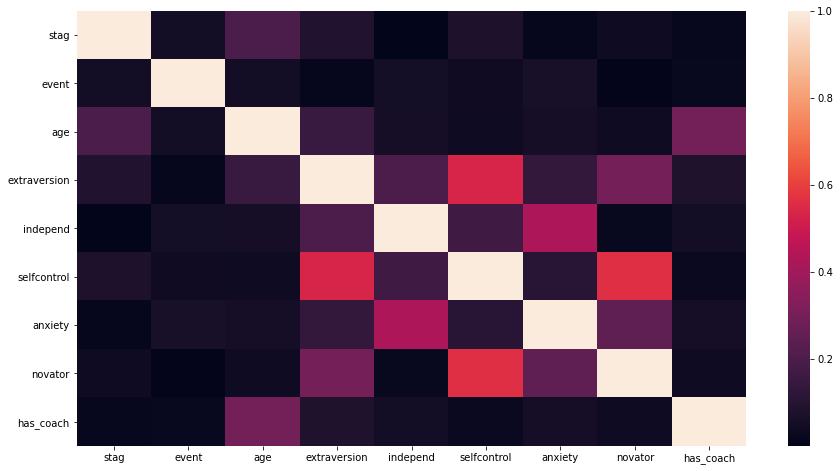

In [14]:
# Визуализируем корреляции с помощью тепловой карты
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(abs(df_hr.corr()),ax=ax)

In [15]:
# Посмотрим на корреляции переменных с фактом увольнений сотрудников
df_hr.corrwith(df_hr.event)

stag           -0.048361
event           1.000000
age            -0.048751
extraversion    0.015458
independ        0.051864
selfcontrol    -0.040040
anxiety        -0.063232
novator         0.006825
has_coach      -0.020177
dtype: float64

Значимые корреляции не наблюдаются.

## Исследование данных

In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [18]:
df_hr.tail()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach
1124,10.612,0,f,41.000,Banks,HR,rabrecNErab,my head,m,white,bus,8.600,3.400,2.600,4.800,8.300,1
1125,10.612,0,f,41.000,Banks,HR,rabrecNErab,my head,m,white,bus,8.600,3.400,2.600,4.800,8.300,1
1126,118.801,0,f,34.000,Telecom,Accounting,KA,no,f,white,bus,4.600,5.500,7.200,6.300,3.700,0
1127,49.413,0,f,51.000,Consult,HR,empjs,no,m,grey,bus,3.800,7.600,5.700,6.300,5.200,0
1128,24.838,0,f,29.000,Retail,HR,youjs,no,f,white,car,9.400,1.200,4.100,5.600,6.700,0


In [19]:
# Перекодируем категориальные переменные в целые числа
df_hr['industryID'] = pd.Categorical(df_hr.industry).codes
df_hr[['industryID','industry']]

,industryID,industry
0,2,Banks
1,2,Banks
2,8,PowerGeneration
3,8,PowerGeneration
4,10,Retail
...,...,...
1124,2,Banks
1125,2,Banks
1126,12,Telecom
1127,4,Consult


In [20]:
df_hr['professionID'] = pd.Categorical(df_hr.profession).codes
df_hr[['professionID','profession']]

,professionID,profession
0,6,HR
1,6,HR
2,6,HR
3,6,HR
4,2,Commercial
...,...,...
1124,6,HR
1125,6,HR
1126,0,Accounting
1127,6,HR


In [21]:
df_hr['trafficID'] = pd.Categorical(df_hr.traffic).codes
df_hr[['trafficID','traffic']]

,trafficID,traffic
0,4,rabrecNErab
1,2,empjs
2,4,rabrecNErab
3,4,rabrecNErab
4,7,youjs
...,...,...
1124,4,rabrecNErab
1125,4,rabrecNErab
1126,0,KA
1127,2,empjs


In [22]:
df_hr['greywageID'] = pd.Categorical(df_hr.greywage).codes
df_hr[['greywageID','greywage']]

,greywageID,greywage
0,1,white
1,1,white
2,1,white
3,1,white
4,1,white
...,...,...
1124,1,white
1125,1,white
1126,1,white
1127,0,grey


In [23]:
df_hr['wayID'] = pd.Categorical(df_hr.way).codes
df_hr[['wayID','way']]

,wayID,way
0,0,bus
1,0,bus
2,0,bus
3,0,bus
4,0,bus
...,...,...
1124,0,bus
1125,0,bus
1126,0,bus
1127,0,bus


In [24]:
# Выведем таблицу с новыми переменными
pd.options.display.max_columns = 999
df_hr.tail()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach,industryID,professionID,trafficID,greywageID,wayID
1124,10.612,0,f,41.000,Banks,HR,rabrecNErab,my head,m,white,bus,8.600,3.400,2.600,4.800,8.300,1,2,6,4,1,0
1125,10.612,0,f,41.000,Banks,HR,rabrecNErab,my head,m,white,bus,8.600,3.400,2.600,4.800,8.300,1,2,6,4,1,0
1126,118.801,0,f,34.000,Telecom,Accounting,KA,no,f,white,bus,4.600,5.500,7.200,6.300,3.700,0,12,0,0,1,0
1127,49.413,0,f,51.000,Consult,HR,empjs,no,m,grey,bus,3.800,7.600,5.700,6.300,5.200,0,4,6,2,0,0
1128,24.838,0,f,29.000,Retail,HR,youjs,no,f,white,car,9.400,1.200,4.100,5.600,6.700,0,10,6,7,1,1


Сделаем тестовое приложение, которое будет предсказывать увольнение сотрудника на основе имеющихся данных.

Разобьем нашу выборку на пространство признаков (X) и ответов (y)

In [32]:
X = df_hr[['stag', 'industryID', 'professionID', 'trafficID', 
           'greywageID', 'wayID', 'has_coach', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']]

Y = df_hr[['event']]

In [33]:
# В объекте X оказываются признаки
X

,stag,industryID,professionID,trafficID,greywageID,wayID,has_coach,extraversion,independ,selfcontrol,anxiety,novator
0,7.031,2,6,4,1,0,0,6.200,4.100,5.700,7.100,8.300
1,22.965,2,6,2,1,0,0,6.200,4.100,5.700,7.100,8.300
2,15.934,8,6,4,1,0,0,6.200,6.200,2.600,4.800,8.300
3,15.934,8,6,4,1,0,0,5.400,7.600,4.900,2.500,6.700
4,8.411,10,2,7,1,0,1,3.000,4.100,8.000,7.100,3.700
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.612,2,6,4,1,0,1,8.600,3.400,2.600,4.800,8.300
1125,10.612,2,6,4,1,0,1,8.600,3.400,2.600,4.800,8.300
1126,118.801,12,0,0,1,0,0,4.600,5.500,7.200,6.300,3.700
1127,49.413,4,6,2,0,0,0,3.800,7.600,5.700,6.300,5.200


In [34]:
# В объекте Y оказываются ответы для этих признаков
Y

,event
0,1
1,1
2,1
3,1
4,1
...,...
1124,0
1125,0
1126,0
1127,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Посмотрим, каков оказался размер объектов в трейне и тесте
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(903, 12)
(226, 12)
(903, 1)
(226, 1)


In [35]:
Y_test

,event
743,0
1010,1
1123,0
140,1
554,1
...,...
827,1
430,0
12,1
599,0


### Моделирование

In [36]:
# Создадим модель линейной регрессии
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Посмотрим, какие из признаков оказались наиболее значимыми для предсказания увольнения
importance = lin_model.coef_
print(importance)

[[-0.00043623 -0.00450401  0.0090047  -0.00163607 -0.08108478 -0.03389723
  -0.03118954 -0.00048376  0.00570908 -0.01051338 -0.02188238  0.00031802]]


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
# Определим функцию оценки ошибки получившейся модели

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

### Оценка

Попробуем оценить, насколько хороша наша модель.
Оценку следует проводить на двух выборках: на той, на которой модель тренировалась (X_train, Y_train), и на той, которую модель не видела (X_test, Y_test).

In [40]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.4950988681056171
R2 score is 0.01949762099953345
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.49664157139924353
R2 score is 0.011453155275346183


In [41]:
X_test

,stag,industryID,professionID,trafficID,greywageID,wayID,has_coach,extraversion,independ,selfcontrol,anxiety,novator
743,79.540,5,7,7,1,1,1,4.600,5.500,8.700,4.800,4.400
1010,7.129,4,6,7,1,0,1,5.400,6.900,7.200,2.500,4.400
1123,6.669,2,6,7,1,0,0,9.400,5.500,3.300,4.000,7.500
140,20.041,14,6,1,1,1,1,9.400,3.400,1.800,8.700,7.500
554,3.811,13,9,7,1,0,0,3.800,6.200,6.400,4.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...
827,17.183,10,6,7,1,0,1,6.200,4.800,7.200,4.000,6.700
430,2.136,2,11,1,1,2,0,5.400,7.600,4.100,5.600,9.000
12,20.928,4,6,4,1,2,1,5.400,8.400,4.900,3.300,6.000
599,18.168,10,6,3,1,0,1,5.400,4.800,4.900,7.100,6.700


In [42]:
"""
Допустим, в компании работает человек со следующими параметрами: 

stag = 2 
industryID = 4
professionID = 1
trafficID = 3
greywageID = 0
wayID = 2
has_coach = 0
extraversion = 3.8
independ = 6.2
selfcontrol = 8.7
anxiety = 2.5
novator = 6

Какова вероятность его увольнения?

Выясним это, используя метод .predict() только что обученной модели lin_model. 
Передадим в него параметры сотрудника. 

"""

lin_model.predict([[2,4,1,3,0,2,0,3.8,6.2,8.7,2.5,6]])

array([[0.56444216]])

Следовательно, если 0 соответствует продолжению работы, а 1 - увольнению, с вероятностью 56,4% сотрудник с таким набором параметров покинет компанию.

### Улучшение/изменение модели

R2-score (доля объясняемой нашими фичами информации) низкий, поэтому попробуем поэкспериментировать и улучшить результаты.

In [73]:
# Уберем из модели сугубо личностные признаки
X = df_hr[['stag', 'industryID', 'professionID', 'trafficID', 'greywageID', 'wayID', 'has_coach']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [74]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [75]:
importance = lin_model.coef_
print(importance)

[[-0.00045864 -0.00525827  0.0097535  -0.00243229 -0.07052871 -0.03593085
  -0.02575729]]


In [76]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.4971472056939478
R2 score is 0.011367711547074943
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.494851940680603
R2 score is 0.01856470773335228


В результате удаления из модели нескольких признаков R2-score немного повысился. Следовательно, вторая модель лучше объясняет информацию.

### Скалирование признаков

Уравняем признаки в модели по общей шкале.

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [77]:
X = df_hr[['stag', 'industryID', 'professionID', 'trafficID', 'greywageID', 'wayID', 'has_coach']]
X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-0.0821212  -0.078874    0.13654904 -0.01702601 -0.07052871 -0.07186169
  -0.02575729]]


In [78]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.4971472056939479
R2 score is 0.011367711547074832
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.49485194068060306
R2 score is 0.01856470773335217


Скалирование признаков не дало увеличения R2-score.

## Заключение

Подытожим выводы:

* В наборе данных нет отсутствующих или ошибочных значений, и все признаки представлены правильными типами данных;
* Такие переменные, как показатели экстраверсии, независимости и тревожности, визуально напоминают нормальные распределения. Однако по итогам теста Шапиро-Уилка ни одно из распределений не является нормальным;
* В датасете отсутствуют высокие корреляции. Средние отрицательные корреляции наблюдаются между переменными экстраверсия и самоконтроль, новаторство и самоконтроль;
* Отсутствуют значимые корреляции переменных с фактом увольнений сотрудников;
* Сделано тестовое приложение, предсказывающее увольнение сотрудника на основе имеющихся данных. Полученные показатели модели: RMSE - 0.4948, R2 - 0.0186;
* Наиболее значимые для модели фичи: профессия, стаж работы, отрасль компании.